#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [24]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [25]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [26]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [27]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [28]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [30]:
model = Sequential()

In [31]:
#卷積層1

In [32]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [33]:
model.add(Dropout(rate=0.25))

In [34]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [35]:
#卷積層2與池化層2

In [36]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [37]:
model.add(Dropout(0.25))

In [38]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [39]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [40]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [41]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [42]:
model.add(Dense(10, activation='softmax'))

In [43]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

# 載入之前訓練的模型

In [44]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [45]:
#模型編譯
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

In [46]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         

Epoch 1/12
293/293 [==============================] - 75s 252ms/step - loss: 1.5211 - accuracy: 0.4548 - val_loss: 1.3440 - val_accuracy: 0.5662
Epoch 2/12
293/293 [==============================] - 75s 256ms/step - loss: 1.1734 - accuracy: 0.5830 - val_loss: 1.1630 - val_accuracy: 0.6286
Epoch 3/12
293/293 [==============================] - 76s 258ms/step - loss: 1.0291 - accuracy: 0.6357 - val_loss: 1.0612 - val_accuracy: 0.6510
Epoch 4/12
293/293 [==============================] - 82s 279ms/step - loss: 0.9215 - accuracy: 0.6768 - val_loss: 0.9879 - val_accuracy: 0.6818
Epoch 5/12
293/293 [==============================] - 82s 282ms/step - loss: 0.8405 - accuracy: 0.7017 - val_loss: 0.9260 - val_accuracy: 0.6994
Epoch 6/12
293/293 [==============================] - 82s 280ms/step - loss: 0.7554 - accuracy: 0.7357 - val_loss: 0.9155 - val_accuracy: 0.6962
Epoch 7/12
293/293 [==============================] - 83s 282ms/step - loss: 0.6886 - accuracy: 0.7589 - val_loss: 0.8933 - val_ac

In [47]:
#模型編譯
model.compile(loss='MSE', optimizer='Adam', metrics=['accuracy'])

In [48]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)   

Epoch 1/12
293/293 [==============================] - 75s 252ms/step - loss: 0.0183 - accuracy: 0.8764 - val_loss: 0.0372 - val_accuracy: 0.7304
Epoch 2/12
293/293 [==============================] - 74s 253ms/step - loss: 0.0168 - accuracy: 0.8869 - val_loss: 0.0373 - val_accuracy: 0.7324
Epoch 3/12
293/293 [==============================] - 82s 281ms/step - loss: 0.0160 - accuracy: 0.8922 - val_loss: 0.0371 - val_accuracy: 0.7333
Epoch 4/12
293/293 [==============================] - 74s 252ms/step - loss: 0.0144 - accuracy: 0.9043 - val_loss: 0.0373 - val_accuracy: 0.7318
Epoch 5/12
293/293 [==============================] - 74s 252ms/step - loss: 0.0138 - accuracy: 0.9079 - val_loss: 0.0375 - val_accuracy: 0.7294
Epoch 6/12
293/293 [==============================] - 74s 251ms/step - loss: 0.0127 - accuracy: 0.9150 - val_loss: 0.0372 - val_accuracy: 0.7311
Epoch 7/12
293/293 [==============================] - 73s 250ms/step - loss: 0.0121 - accuracy: 0.9202 - val_loss: 0.0370 - val_ac

In [51]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)



Epoch 1/12
293/293 [==============================] - 77s 251ms/step - loss: 0.2644 - accuracy: 0.7773 - val_loss: 0.2499 - val_accuracy: 0.6774
Epoch 2/12
293/293 [==============================] - 74s 251ms/step - loss: 0.1637 - accuracy: 0.8527 - val_loss: 0.2030 - val_accuracy: 0.7078
Epoch 3/12
293/293 [==============================] - 72s 246ms/step - loss: 0.1225 - accuracy: 0.8911 - val_loss: 0.1787 - val_accuracy: 0.7194
Epoch 4/12
293/293 [==============================] - 75s 257ms/step - loss: 0.0980 - accuracy: 0.9140 - val_loss: 0.1665 - val_accuracy: 0.7261
Epoch 5/12
293/293 [==============================] - 73s 249ms/step - loss: 0.0854 - accuracy: 0.9281 - val_loss: 0.1571 - val_accuracy: 0.7374
Epoch 6/12
293/293 [==============================] - 72s 247ms/step - loss: 0.0771 - accuracy: 0.9349 - val_loss: 0.1528 - val_accuracy: 0.7382
Epoch 7/12
293/293 [==============================] - 72s 247ms/step - loss: 0.0703 - accuracy: 0.9421 - val_loss: 0.1494 - val_ac

NameError: name 'show_train_history' is not defined

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

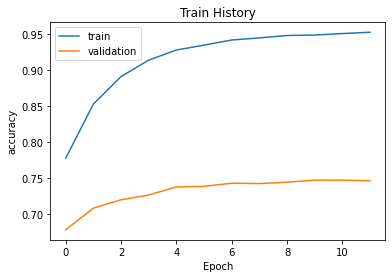

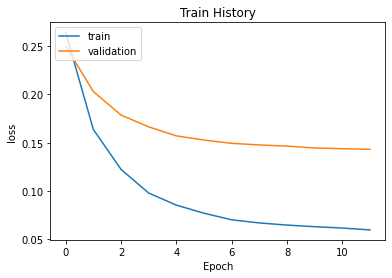

In [53]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')